<h1 align="center"> Craps Strategy Simulator</h1>
<h3 align="center"> Isaac Robbins</h3>

An interactive presentation the functions, findings, and conclusions from the Craps simulator I worte. Enjoy!!

In [1]:
import Craps
from matplotlib import pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.dpi"] = 150     # Raise figure quality.

### Simulating All Bets Simultaneously

The `play_all_repeating(max_rolls)` function creates a different `Player` object for each bet adds them to the `Table` object. Each roll, every player will bet $50 on their respective bet and the simulation continues until every player has lost their money or until the maximum number of rolls have been rolled. At this point the a graph is displayed of all bets that have not lost all of their money

Parameters:
- `max_rolls` `(int)`: The maximum number of rolls to simulate. (About 100 rolls/hour is normal in a casino, thus 200 rolls would simulate playing for about 2 hours)

This is a fun function to play with because it seems like someone always wins big. It is not uncommon for one of the players to get up to \$3000.

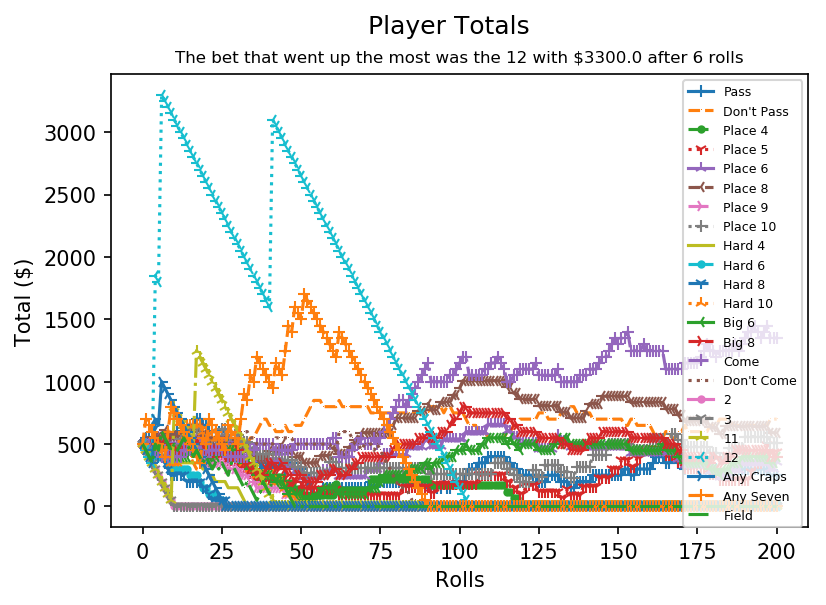

In [3]:
Craps.play_all_repeating(200)

### Simulating All Bets Simultaneously

The `stats_all_repeating(iterations)` function runs the `play_all_repeating()` function until all players (representing all of the different bets) have run out of money generating `iterations` random samples for statistical analysis.

Parameters:
- `iterations` `(int)`: The number of samples to be generated

Returns:
- `rolls` `(np.array)`: The number of rolls before each bet went broke for each iteration 
- `max_win` `(np.array)`: The maximum total amount each player reached in each iteration
- `max_win_rolls` `(np.array)`: The number of rolls after which each player reached their maximum total amount for each iteration
- `best_bet` `(np.array)`: The bet in each iteration that reached the highest total amount


I ran this function for 10000 iterations to get a large sample of data and saved the results into the `'stats_10000.npz'` file. The cells below analyze this data.

In [4]:
# Loads the data from the 10000 samples and separates it into separate variables
data = np.load('data_10000.npz')
rolls = np.stack(data['rolls'])
max_win = np.stack(data['max_win'])
max_win_rolls = np.stack(data['max_win_rolls'])
best_bet = np.stack(data['best_bet'])

# Calculates means and standard deviations for each variable (except best_bet)
max_win_rolls_mean = np.around(np.mean(max_win_rolls, axis = 0), decimals = 4)
max_win_rolls_std = np.around(np.std(max_win_rolls, axis = 0), decimals = 4)
max_win_mean = np.around(np.mean(max_win, axis = 0), decimals = 4)
max_win_std = np.around(np.std(max_win, axis = 0), decimals = 4)
mean_rolls = np.around(np.mean(rolls, axis = 0), decimals = 4)
std_rolls = np.around(np.std(rolls, axis = 0), decimals = 4)

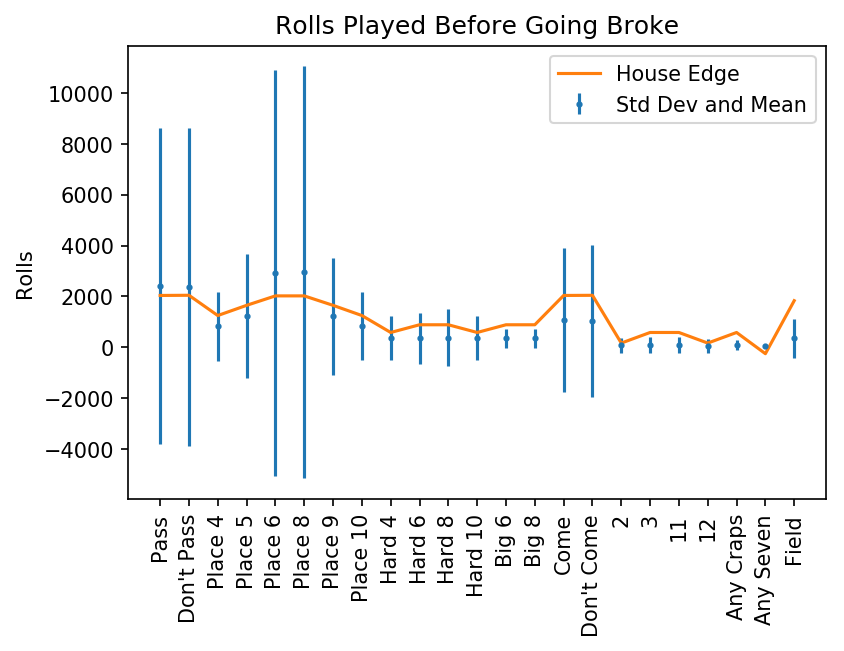

In [10]:
# Plots the means vs standard deviations for the number of rolls played before going broke
dom = np.arange(23)
plt.title("Rolls Played Before Going Broke")
plt.errorbar(dom, mean_rolls, std_rolls, fmt = '.', markersize = 4, label = "Std Dev and Mean")
plt.plot(dom, (15 - np.asarray(Craps.house_edge)) * 150, label = "House Edge")
plt.xticks(dom, Craps.play_bets, rotation = 'vertical')
plt.ylabel("Rolls")
plt.legend()
plt.show()

This information very closely mimics the house edge which I have scaled and shifted so that it overlays nicely. The variation is due to the fact that different rolls are played every single roll (Hard bets, Big bets, 2, 3, 11, 12) while others take a few rolls to play (Pass bets, Place bets, Come bets).

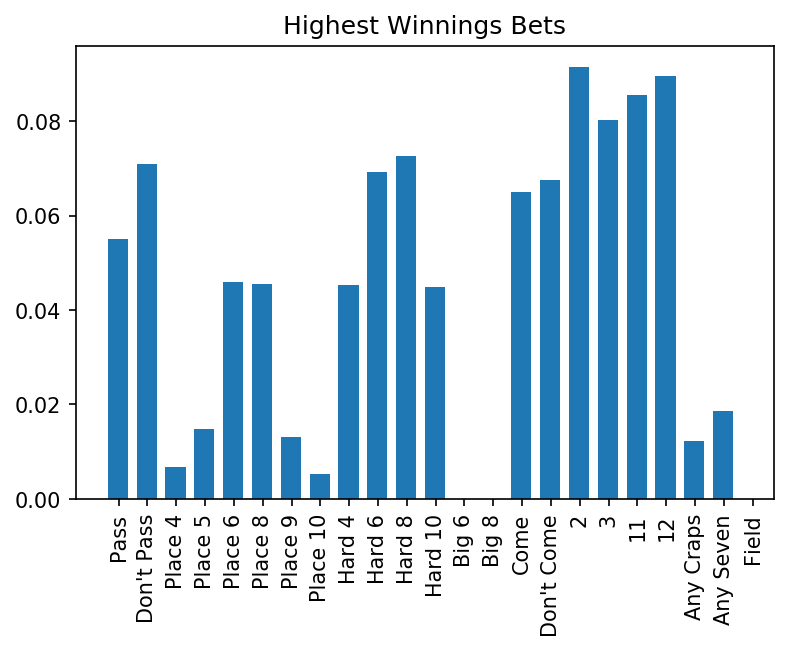

In [6]:
c = np.array(best_bet, dtype = int)
plt.title("Highest Winnings Bets")
plt.hist(c, bins = np.arange(23) - .5, width = .7, density = 1)
plt.xticks(np.arange(23) - .125, Craps.play_bets, rotation = 'vertical')
plt.show()

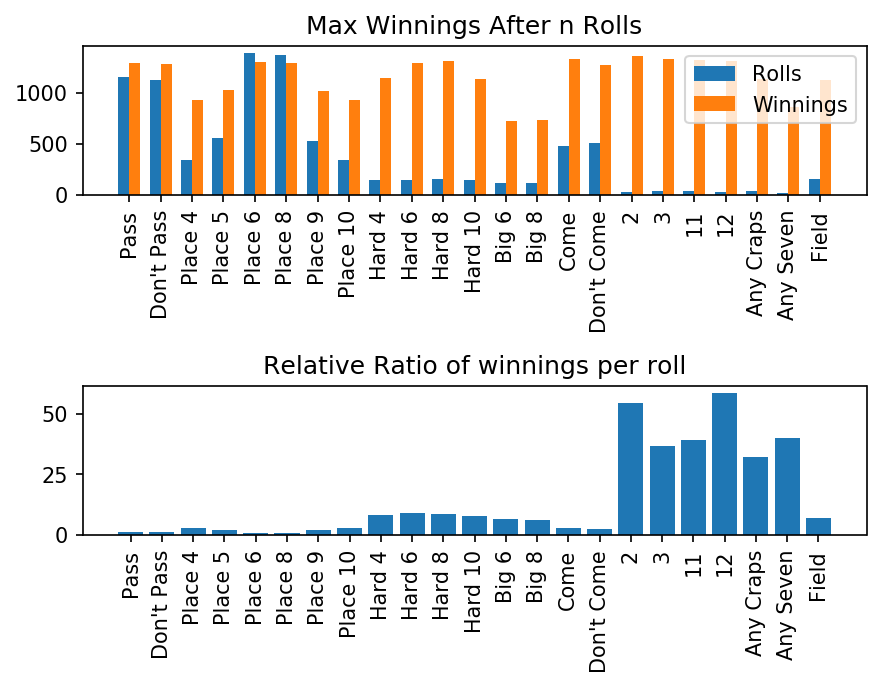

In [7]:
dom = np.arange(23)
plt.subplot(211)
plt.title("Max Winnings After n Rolls")
plt.bar(dom - .175, max_win_rolls_mean, label ="Rolls", width = .35)
plt.bar(dom + .175, max_win_mean, label = "Winnings", width = .35)
plt.legend()
plt.xticks(np.arange(23), Craps.play_bets, rotation = 'vertical')
plt.subplot(212)
plt.title("Relative Ratio of winnings per roll")
plt.bar(dom, (max_win_mean) / max_win_rolls_mean)
plt.tight_layout()
plt.xticks(dom, Craps.play_bets, rotation = 'vertical')
plt.show()

These charts seem to suggest that playing the 2, 3, 11, and 12, may be viable strategies. These bets have the highest payouts, or in other words, you can get up the fastest with these bets if you are very lucky. These charts show the average number of rolls after which each bet reached its maximum total as well as what that total was. I toyed with the strategy of playing these bets where you would play the bet the acerage number of rolls until that bet reached its maximum from the data and then cashout. The idea is if you get lucky playing the 12, while you would usually lose your money quickly, the amount you would win on the few times that you do get lucky would give you an advantage in the long run. Below is the graph representing this strategy.

### Betting the 'Optimal' Number Of Rolls Strategy

The `max_single_bet(bet, opt_rolls)` is an implementation of the strategy of betting the same bet for the input optimum number of rolls before cashing out.
Plots a graph of of the mean winnings for 2000 samples of this strategy. This is done for 7 different roll values (the middle/fourth being the actual 'optimum' roll value) for comparison.

This function can take up to a minute to run as many samples are necessary for a stable mean calculation for each different roll value. Although the initial intent of this strategy is to play the 2 or 12, any bet can be tested with similar results for each one.

Parameters:
- `bet` `(str)`: The name of the bet the player will be playing
- `opt_rolls` `(int)`: Calculated from the stats_all_repeating function, this is the average number of rolls before the bet reaches its maximum winnings

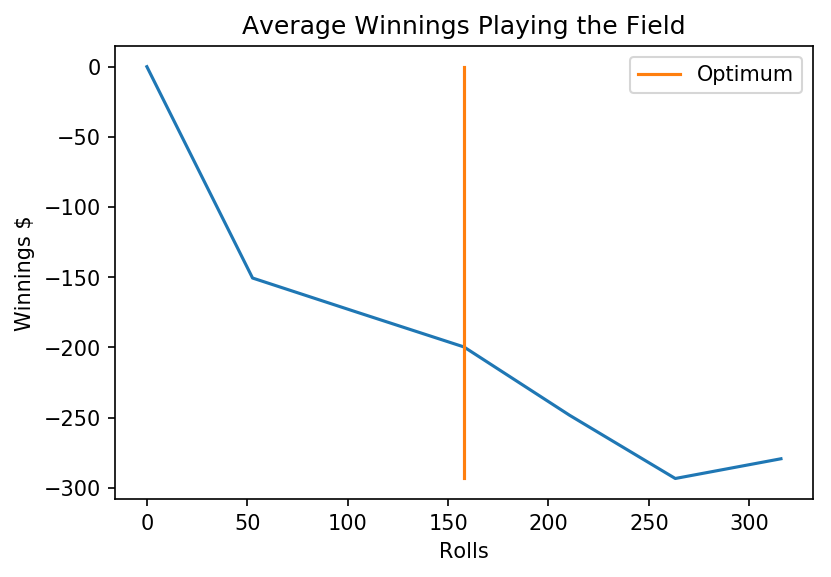

In [8]:
bet = 'Field'
Craps.max_single_bet(bet, max_win_rolls_mean[Craps.play_bets_dict[bet]])

### Analysis and Conclusions
This shows the folly in the visualizations above and how they can provide misleading data. This does not provide a successful strategy as suggested by the data. There is no question that on average the 12 wins \\$809.85 after an average of 22 rolls but we cannot conclude that if we bet the 12 for 22 rolls that we are going to be up \\$809.85. In fact, we'll be closer to \\$100 down. This is because this metric selects the maximum or best data and removes, in large part, the randomness of each sample giving extremely biased data. When we cash out after 22 rolls no matter what, we reintroduce the randomness into the samples giving us the results that we expected.

Honestly, at this point I feel like I have exhausted the usefulness of this project as I have only solidified my knowledge that the house always has the edge. There really is no way to win or even get a small egde over the house, but let's be honest we already knew that. I am just a lot more sure about that. 

Below is the useful information I gathered. My final takeaway from all of this is that playing the right bets you honestly pretty good odds and because the standard deviations are so big, you will go up fairly often. The problem is when we go up we usually keep playing, but when we go down, we have to stop playing. 

#### Best Strategy: Skip the casino and go hit that fancy restaurant you always wanted to try. It's a win win...  Unless that was the time you would have gotten really lucky...

In [9]:
lpr = 500/mean_rolls
spr = std_rolls/mean_rolls

print('Bet', '\t\t', "% Lost/Roll", '\t', 'Loss/Hour $5', '\t', 'Std Dev/Hour $5', 'Loss/Hour $25', '\t', 'Std Dev/Hour $25\n')
for i in range(23):
    if len(Craps.play_bets[i]) <= 6:
        print(Craps.play_bets[i], '\t\t', format(lpr[i]/50, '.4f'), ' \t', '$' + str(format(lpr[i]*10, '.2f')), ' \t', '$' + str(format(spr[i]*10, '.2f')), ' \t', '$' + str(format(lpr[i]*50, '.2f')), ' \t', '$' + str(format(spr[i]*50, '.2f')))
    else:
        print(Craps.play_bets[i], '\t', format(lpr[i]/50, '.4f'), ' \t', '$' + str(format(lpr[i]*10, '.2f')), ' \t', '$' + str(format(spr[i]*10, '.2f')), ' \t', '$' + str(format(lpr[i]*50, '.2f')), ' \t', '$' + str(format(spr[i]*50, '.2f')))

Bet 		 % Lost/Roll 	 Loss/Hour $5 	 Std Dev/Hour $5 Loss/Hour $25 	 Std Dev/Hour $25

Pass 		 0.0041  	 $2.07  	 $25.65  	 $10.33  	 $128.24
Don't Pass 	 0.0042  	 $2.11  	 $26.30  	 $10.54  	 $131.52
Place 4 	 0.0122  	 $6.11  	 $16.61  	 $30.53  	 $83.05
Place 5 	 0.0080  	 $4.01  	 $19.54  	 $20.05  	 $97.70
Place 6 	 0.0034  	 $1.71  	 $27.38  	 $8.57  	 $136.89
Place 8 	 0.0034  	 $1.70  	 $27.44  	 $8.48  	 $137.22
Place 9 	 0.0082  	 $4.11  	 $19.01  	 $20.57  	 $95.03
Place 10 	 0.0122  	 $6.10  	 $16.29  	 $30.49  	 $81.43
Hard 4 		 0.0280  	 $14.01  	 $24.45  	 $70.05  	 $122.27
Hard 6 		 0.0286  	 $14.30  	 $28.28  	 $71.48  	 $141.41
Hard 8 		 0.0266  	 $13.31  	 $30.07  	 $66.55  	 $150.33
Hard 10 	 0.0280  	 $14.02  	 $24.31  	 $70.11  	 $121.55
Big 6 		 0.0282  	 $14.09  	 $10.52  	 $70.47  	 $52.58
Big 8 		 0.0280  	 $14.01  	 $10.51  	 $70.03  	 $52.54
Come 		 0.0094  	 $4.68  	 $26.60  	 $23.41  	 $132.98
Don't Come 	 0.0096  	 $4.79  	 $28.66  	 $23.97  	 $143.29
2 	